# (1) Problem 7.3

1

In [42]:
library(mvtnorm)

In [3]:
Y_b <- read.table("bluecrab.dat")
Y_o <- read.table("orangecrab.dat")
Y_b<-cbind(Y_b$V1,Y_b$V2)
Y_o<-cbind(Y_o$V1,Y_o$V2)

In [44]:
n_b <- nrow(Y_b)
n_o <- nrow(Y_o)
n_b

[1] 50

In [48]:
rinvwish<-function(n,nu0,iS0) 
{
  sL0 <- chol(iS0) 
  S<-array( dim=c( dim(iS0),n ) )
  for(i in 1:n) 
  {
    Z <- matrix(rnorm(nu0 * dim(iS0)[1]), nu0, dim(iS0)[1]) %*% sL0  
    print(Z)
    S[,,i]<- solve(t(Z)%*%Z)
  }     
  S[,,1:n]
}
rinvwish(1,2,cov(Y_b))

          [,1]      [,2]
[1,] -2.220501 -2.458570
[2,]  1.983762  4.235678


1.1698094,-0.6760618
-0.6760618,0.4324046


In [14]:
chol(cov(Y_b))

2.111648,3.1009246
0.000000,0.7896531


In [46]:

v0<-4
ybar_b<- mu0_b <- apply(Y_b,2,mean)
ybar_o<-mu0_o <- apply(Y_o,2,mean)
S0_b <-Rambda0_b <- Sigma_b<- cov(Y_b)
S0_o <- Rambda0_o <-Sigma_o<- cov(Y_o)
mu0_b
S0_b

[1] 11.718 13.350

4.459057,6.548061
6.548061,10.239286


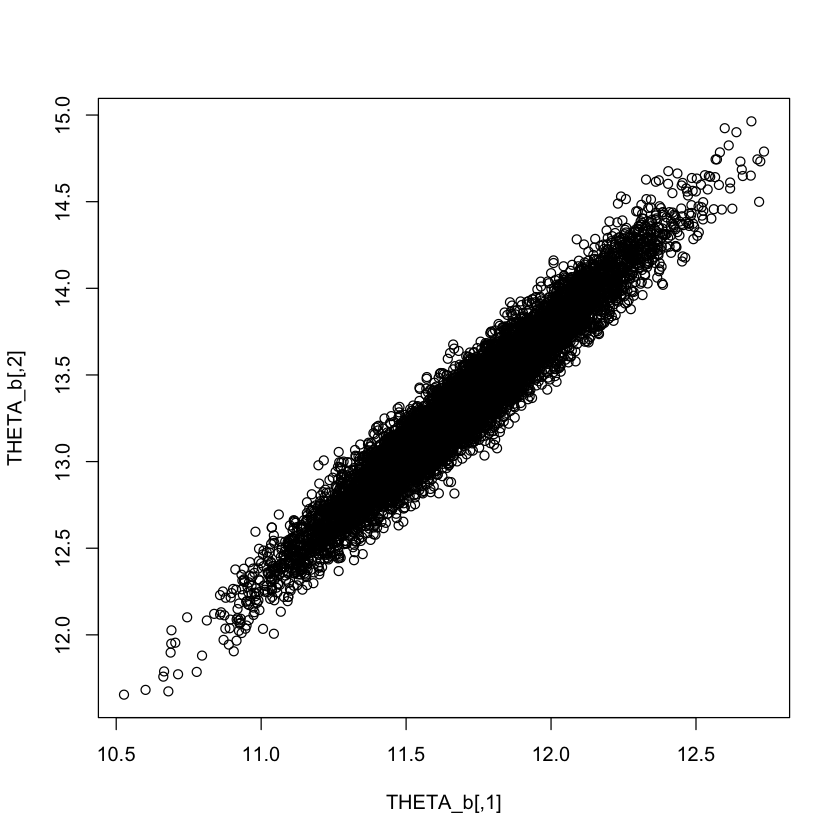

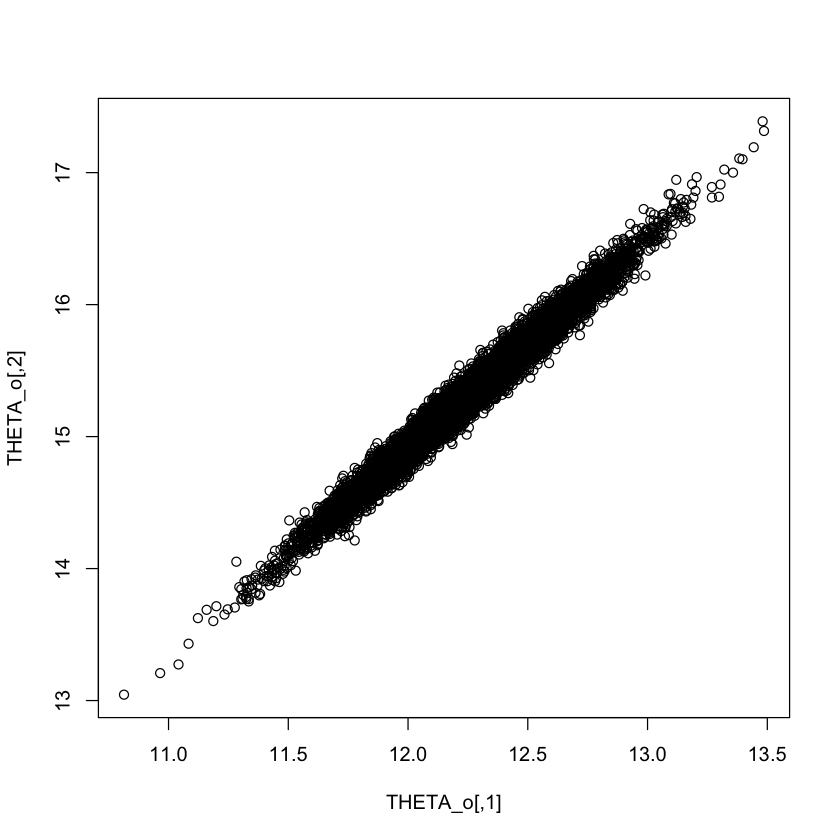

In [47]:

Yn_b<-THETA_b<-SIGMA_b<-NULL
Yn_o<-THETA_o<-SIGMA_o<-NULL
for (i in 1:10000){
Rambdan_b<-solve(solve(Rambda0_b)+n_b*solve(Sigma_b))
Rambdan_o<-solve(solve(Rambda0_o)+n_b*solve(Sigma_o))
mun_b<-Rambdan_b%*%(solve(Rambda0_b)%*%mu0_b+n_b*solve(Sigma_b)%*%ybar_b)
mun_o<-Rambdan_o%*%(solve(Rambda0_o)%*%mu0_o+n_o*solve(Sigma_o)%*%ybar_o)
theta_b<- rmvnorm(1,mun_b,Rambdan_b)
theta_o<- rmvnorm(1,mun_o,Rambdan_o)

Sn_b<-S0_b+(t(Y_b)-c(theta_b))%*%t(t(Y_b)-c(theta_b))
Sigma_b<-rinvwish(1,v0+n_b,solve(Sn_b))
Sn_o<-S0_o+(t(Y_o)-c(theta_o))%*%t(t(Y_o)-c(theta_o))
Sigma_o<-rinvwish(1,v0+n_o,solve(Sn_o))

Yn_b<-rbind(Yn_b,rmvnorm(1,theta_b,Sigma_b))
THETA_b<-rbind(THETA_b,theta_b) ; SIGMA_b<-rbind(SIGMA_b,c(Sigma_b))
Yn_o<-rbind(Yn_o,rmvnorm(1,theta_o,Sigma_o))
THETA_o<-rbind(THETA_o,theta_o) ; SIGMA_o<-rbind(SIGMA_o,c(Sigma_o))
}
par(bg='white')
plot(THETA_b)
plot(THETA_o)


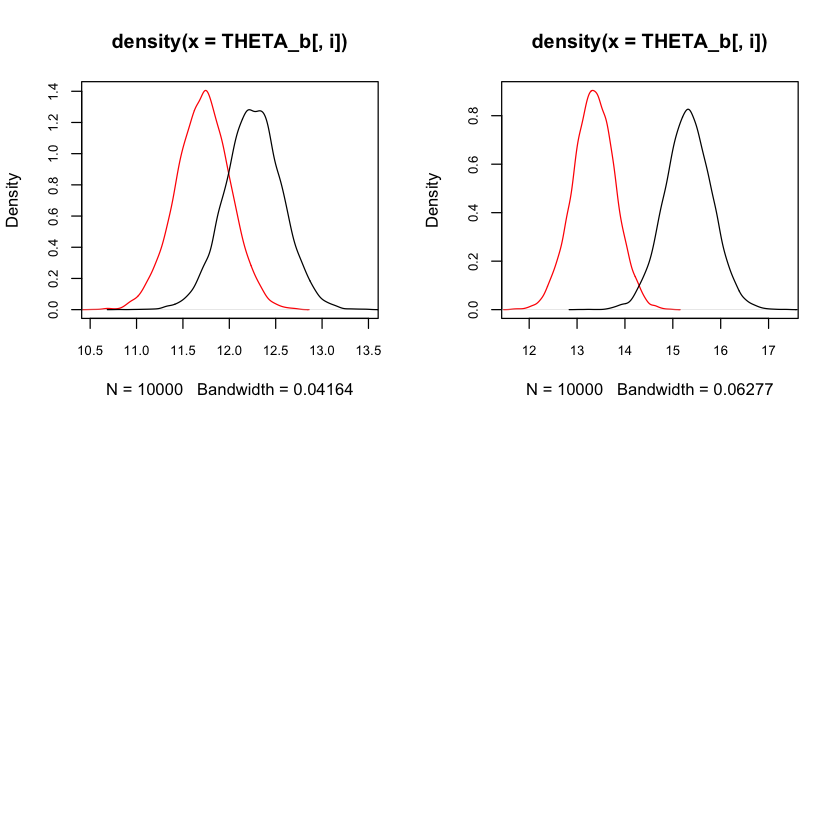

In [48]:
par(bg='white')
par(mfrow=c(2,2))
for (i in 1:2){
  xl<-c(min(range(THETA_b[,i])[1],range(THETA_o[,i])[1]),max(range(THETA_b[,i])[2],range(THETA_o[,i])[2]))
  d_b<-density(THETA_b[,i])
  d_o<-density(THETA_o[,i])
  plot(d_b,xlim=xl,col="red",cex.axis=0.8)
  lines(d_o)
}



[1] 0.9889

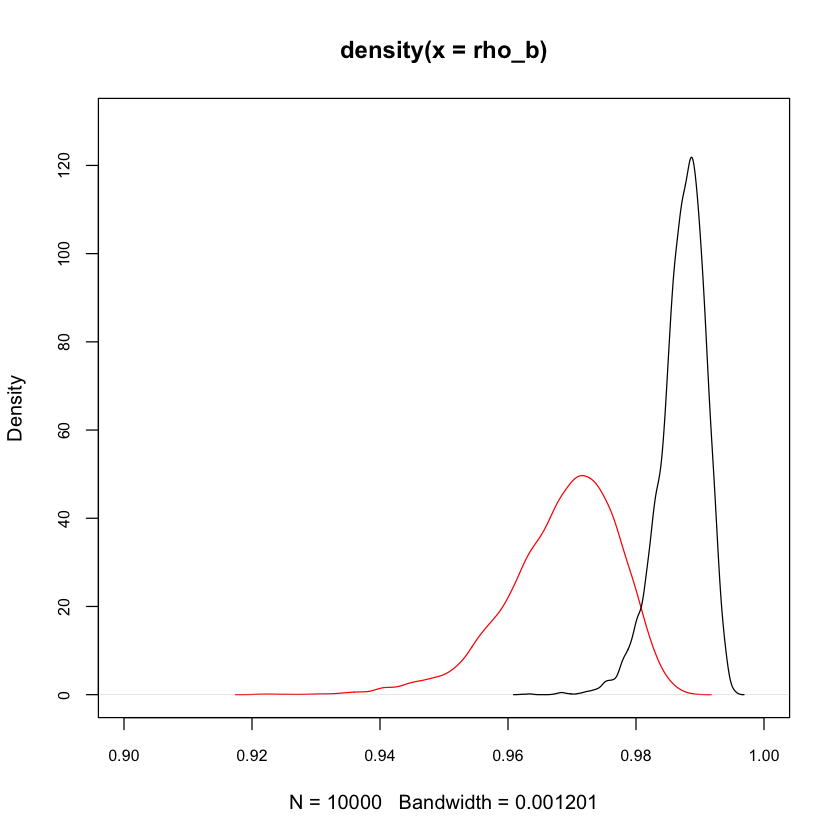

In [51]:
par(bg='white')
rho_b=SIGMA_b[,2]/sqrt(SIGMA_b[,1]*SIGMA_b[,4])
rho_o=SIGMA_o[,2]/sqrt(SIGMA_o[,1]*SIGMA_o[,4])
xlm<-c(min(range(rho_b),range(rho_o)),max(range(rho_b),range(rho_o)))
ds_b<-density(rho_b)
ds_o<-density(rho_o)
plot(ds_b,col="red",xlim=range(0.9,1),ylim=range(0,130),cex.axis=0.8)
lines(ds_o)
mean(rho_b<rho_o)